In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

from mutual_information import mutual_information_T_Y, mutual_information_X_T, mutual_information_T_C
from utils import NO_CBM, CBM_bool, CBM_fuzzy, CBM_fuzzy_plus, MaskedBoundedEmbedding, SplitEmbedding, orange, light_orange, \
    green, light_green, name_mappings

dataset = "xor"

image_folder = "images"
result_folder = "results"
xor_folder = "xor_activation"
data_folder = os.path.join(result_folder, xor_folder)

# output_file = "test_model_output_on_epoch"
output_file = "test_embedding_vectors_on_epoch"

methods = [NO_CBM, CBM_bool, CBM_fuzzy, CBM_fuzzy_plus, SplitEmbedding]
# methods = [CBM_fuzzy_plus, MaskedBoundedEmbedding, SplitEmbedding]

seeds = [*range(1, 6)]
epochs = [*range(100), *range(100, 1025, 25)]

results\xor_activation\ConceptBottleneckModelNoConceptSupervisionReLU_fold_1: 100%|██████████| 137/137 [00:00<00:00, 223.00it/s]


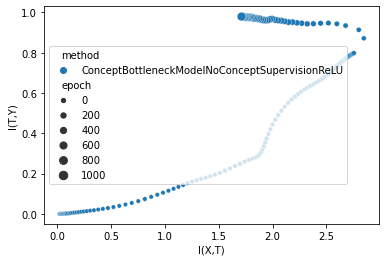

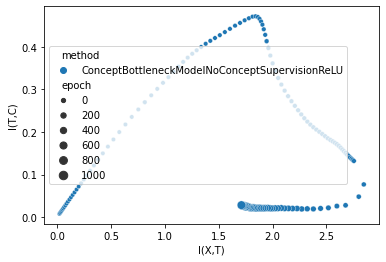

results\xor_activation\ConceptBottleneckModelBool_fold_1: 100%|██████████| 137/137 [00:00<00:00, 246.18it/s]


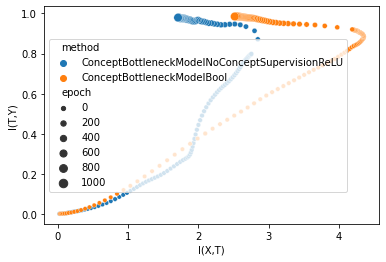

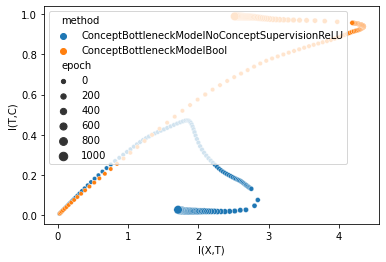

results\xor_activation\ConceptBottleneckModelFuzzy_fold_1: 100%|██████████| 137/137 [00:00<00:00, 174.32it/s]


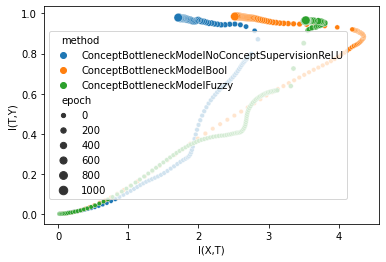

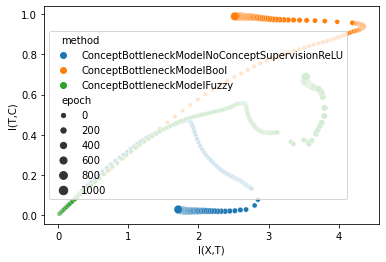

results\xor_activation\ConceptBottleneckModelFuzzyExtraCapacity_LogitOnlyExtra_fold_1: 100%|██████████| 137/137 [00:00<00:00, 234.81it/s]


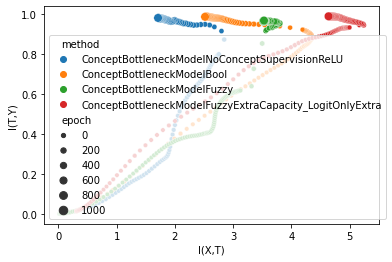

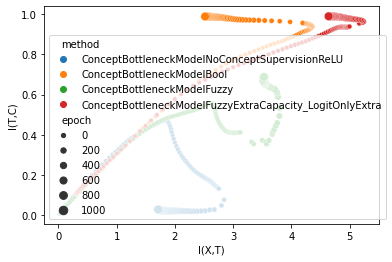

results\xor_activation\SplitEmbModelSharedProb_SigmoidalOnlyProb_fold_1: 100%|██████████| 137/137 [00:00<00:00, 186.89it/s]


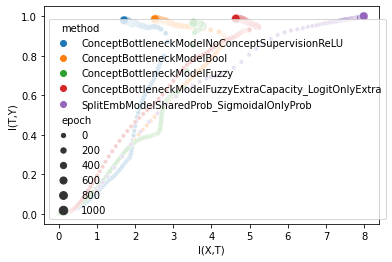

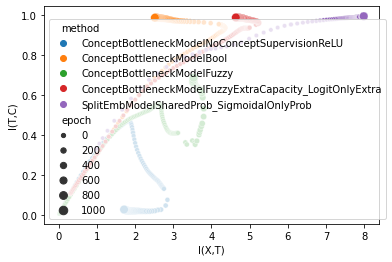

results\xor_activation\ConceptBottleneckModelNoConceptSupervisionReLU_fold_2: 100%|██████████| 137/137 [00:00<00:00, 237.25it/s]
results\xor_activation\ConceptBottleneckModelBool_fold_2: 100%|██████████| 137/137 [00:00<00:00, 231.65it/s]
results\xor_activation\ConceptBottleneckModelFuzzy_fold_2: 100%|██████████| 137/137 [00:00<00:00, 206.72it/s]
results\xor_activation\ConceptBottleneckModelFuzzyExtraCapacity_LogitOnlyExtra_fold_2: 100%|██████████| 137/137 [00:00<00:00, 210.04it/s]
results\xor_activation\SplitEmbModelSharedProb_SigmoidalOnlyProb_fold_2: 100%|██████████| 137/137 [00:00<00:00, 215.31it/s]
results\xor_activation\ConceptBottleneckModelNoConceptSupervisionReLU_fold_3: 100%|██████████| 137/137 [00:00<00:00, 219.79it/s]
results\xor_activation\ConceptBottleneckModelBool_fold_3: 100%|██████████| 137/137 [00:00<00:00, 217.01it/s]
results\xor_activation\ConceptBottleneckModelFuzzy_fold_3: 100%|██████████| 137/137 [00:00<00:00, 222.64it/s]
results\xor_activation\ConceptBottleneckMo

In [2]:
labels_c = np.load(os.path.join(data_folder, "c_test.npy"), allow_pickle=True)
labels_y = np.load(os.path.join(data_folder, "y_test.npy"), allow_pickle=True)

debug = True
metrics = []
for seed in seeds:
    for method in methods:
        folder_name = os.path.join(data_folder, f"{method}_fold_{seed}")
        for epoch in tqdm(epochs, desc=folder_name):

            file = os.path.join(folder_name, f"{output_file}_{epoch}.npy")
            output = np.load(file, allow_pickle=True)

            N = output.shape[1]
            noise_variance = np.log(N) / 100

            MI_X_T, H_T, H_X_T = mutual_information_X_T(output,
                                                        return_H=True, noise_variance=noise_variance)
            MI_T_C, _, H_T_C  = mutual_information_T_C(output, labels_c, entropy_T=H_T,
                                                       return_H=True, noise_variance=noise_variance)
            MI_T_Y, _, H_T_Y = mutual_information_T_Y(output, labels_y, entropy_T=H_T,
                                                      return_H=True, noise_variance=noise_variance)

            # if epoch <= 1:
            #     assert MI_T_Y < 0.8, f"Error in computing at epoch 0 MI_T_Y: {MI_T_Y}"
            #     assert MI_T_C < 0.8, f"Error in computing at epoch 0 MI_T_Y: {MI_T_C}"

            epoch_metric = {
                "dataset": dataset,
                "method": method,
                "seed": seed,
                "epoch": epoch,
                "H(T)": H_T,
                "H(X|T)": H_X_T,
                "H(T|C)": H_T_C,
                "H(T|Y)": H_T_Y,
                "I(X,T)": MI_X_T,
                "I(T,C)": MI_T_C,
                "I(T,Y)": MI_T_Y,
            }
            metrics.append(epoch_metric)
            if debug == 2:
                print(f"\nH(T): {H_T:.2f}, H(X|T): {H_X_T:.2f}, H(T|C): {H_T_C:.2f}, "
                      f"H(T|Y): {H_T_Y:.2f}, I(X,T): {MI_X_T:.2f}, I(T,C): {MI_T_C:.2f}, "
                      f"I(T,Y): {MI_T_Y:.2f}")

        if debug and seed == 1:
            df = pd.DataFrame(metrics)
            sns.scatterplot(data=df, x="I(X,T)", y="I(T,Y)", size="epoch", hue="method")
            plt.show()
            sns.scatterplot(data=df, x="I(X,T)", y="I(T,C)", size="epoch", hue="method")
            plt.show()


df = pd.DataFrame(metrics)
df.to_pickle(f"{dataset}_results.pkl")

In [3]:
df = pd.read_pickle(f"{dataset}_results.pkl")

if not os.path.isdir(image_folder):
    os.makedirs(image_folder)
# os.chdir(image_folder)

ValueError: unsupported pickle protocol: 5

In [4]:
window = 100
df_mean = df.groupby(["dataset", "method", "epoch"]).mean().reset_index()
#
# for method in methods:
#     for seed in seeds:
#         df_mean.loc[(df_mean['method'] == method) &(df_mean["seed"] == seed), 'I(X,T)'] = \
#             df_mean[(df_mean['method'] == method) & (df_mean['seed'] == seed)]['I(X,T)'].rolling(window, min_periods=1).mean()
#         df_mean.loc[(df_mean['method'] == method) &(df_mean["seed"] == seed), 'I(T,C)'] = \
#             df_mean[(df_mean['method'] == method) & (df_mean['seed'] == seed)]['I(T,C)'].rolling(window, min_periods=1).mean()
#         df_mean.loc[(df_mean['method'] == method) &(df_mean["seed"] == seed), 'I(T,Y)'] = \
#             df_mean[(df_mean['method'] == method) & (df_mean['seed'] == seed)]['I(T,Y)'].rolling(window, min_periods=1).mean()

In [5]:
methods = []
for i, row in df_mean.iterrows():
    methods.append(name_mappings[row['method']])
df_mean['Methods'] = methods
# df_mean
methods = np.unique(np.asarray(methods)).tolist()
methods

['Bool', 'Fuzzy', 'Hybrid', 'Isolated Concept Embedding (ours)', 'No concepts']

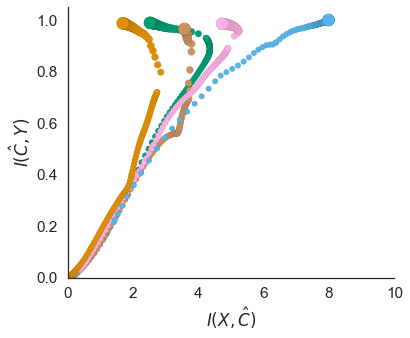

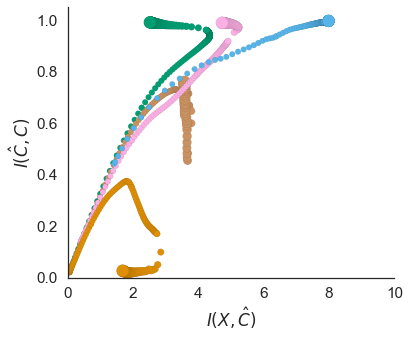

In [11]:
sns.set(style="white", rc={'figure.figsize': (6, 5)}, font_scale=1.4)
# params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{fsmath}']}
# plt.rcParams.update(params)
# color_map = {
# #     'VanillaModel': clrs[0],
#     'VanillaModel': clrs[1],
#     'Bool': clrs[2],
#     'Fuzzy': clrs[5],
#     'Fuzzy+': clrs[6],
# #     'Masked Bounded Embedding': clrs[10],
#     'Concept Embedding': clrs[9],
# }
clrs = sns.color_palette("colorblind", 30)
palette = [clrs[2], clrs[5], clrs[6], clrs[1], clrs[9]]


ax = sns.scatterplot(data=df_mean, x="I(X,T)", y="I(T,Y)",
                     sizes=(30, 150), linewidth=0.05, edgecolor="black",
                hue="Methods", palette=palette, size="epoch")
ax.legend().set_visible(False)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.01,
#                  box.width, box.height * 0.99])
sns.despine()
plt.xlim((0, 10))
plt.ylim((0., 1.05))
plt.ylabel("$I(\hat{C}, Y)$")
plt.xlabel("$I(X, \hat{C})$")
# plt.legend(methods, loc="lower center", bbox_to_anchor=(0.5, -0.3))
plt.tight_layout()
plt.savefig(os.path.join(image_folder, f"{dataset}_plot_I(X,T)vsI(T,Y)"), dpi=200)
plt.show()

ax = sns.scatterplot(data=df_mean, x="I(X,T)", y="I(T,C)",
                     sizes=(30, 150), linewidth=0.05, edgecolor="black",
                     hue="Methods", palette=palette,size="epoch")
ax.legend().set_visible(False)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.01,
#                  box.width, box.height * 0.99])
sns.despine()
plt.xlim((0, 10))
plt.ylim((0., 1.05))
plt.ylabel("$I(\hat{C}, C)$")
plt.xlabel("$I(X, \hat{C})$")
plt.tight_layout()
plt.savefig(os.path.join(image_folder, f"{dataset}_plot_I(X,T)vsI(T,C)"), dpi=200)
plt.show()

In [7]:
image_folder

'images'

In [8]:
# ax = sns.scatterplot(data=df_mean, x="I(X,T)", y="I(T,Y)",
#                      sizes=(30, 150), linewidth=0.05, edgecolor="black",
#                 hue="method", palette=palette, size="epoch", legend=False)
# plt.show()

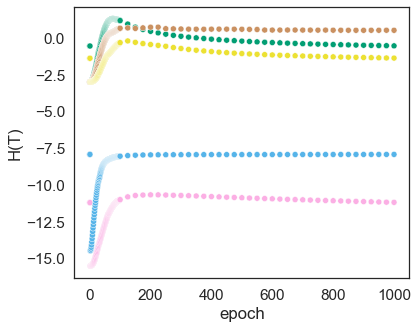

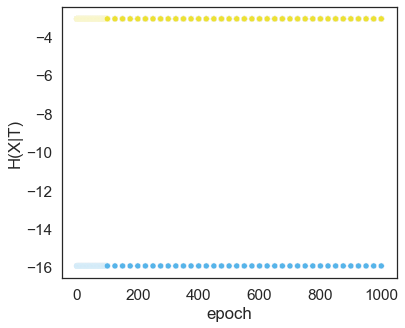

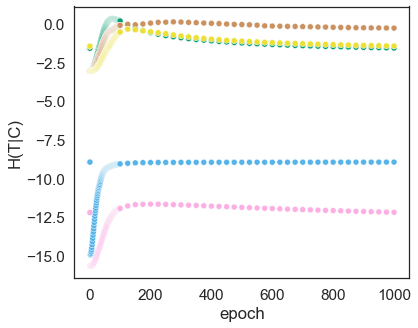

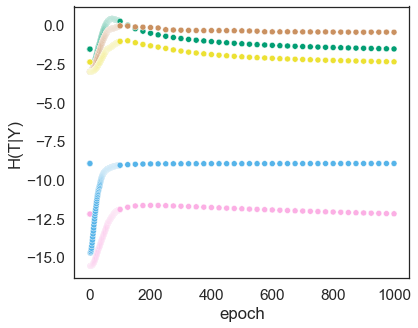

In [9]:
sns.scatterplot(data=df_mean, x="epoch", y="H(T)", hue="method", palette=palette, legend=False)
plt.savefig(os.path.join(image_folder, f"{dataset}_plot_H(T)"))
plt.show()
sns.scatterplot(data=df_mean, x="epoch", y="H(X|T)", hue="method", palette=palette, legend=False)
plt.savefig(os.path.join(image_folder, f"{dataset}_plot_H(T_X)"))
plt.show()
sns.scatterplot(data=df_mean, x="epoch", y="H(T|C)", hue="method", palette=palette, legend=False)
plt.savefig(os.path.join(image_folder, f"{dataset}_plot_H(T_C)"))
plt.show()
sns.scatterplot(data=df_mean, x="epoch", y="H(T|Y)", hue="method", palette=palette, legend=False)
plt.savefig(os.path.join(image_folder, f"{dataset}_plot_H(T_Y)"))
plt.show()

